By Kennedy Kiria

Date: 12/06/2020

Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics




#### Importing necessary libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')

#### Loading the data set

In [76]:
df = pd.read_csv('E:\python for data science\datasets_11142_15488_HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Exploring the Dataset

In [77]:
df.shape

(14999, 10)

In [78]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [79]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [80]:
#checking for missing values in our dataset
df.isnull().any().sum()

0

In [81]:
left = df[df.left == 1].left
left.count()

3571

In [82]:
retained = df[df.left == 0].left
retained.count()

11428

#### Average number per column

In [83]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

1. **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

2. **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

3. **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm


#### Impact of Salary on employee retention 

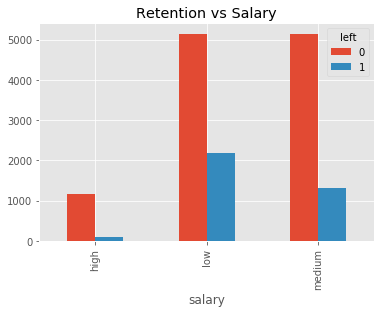

In [84]:
pd.crosstab(index= df['salary'], columns=df['left']).plot(kind='bar')
plt.title('Retention vs Salary')
plt.xlabel('salary')
plt.show()

Above bar chart shows employees with high salaries are likely to not leave the company


#### Departmentwise Employees Retention rate

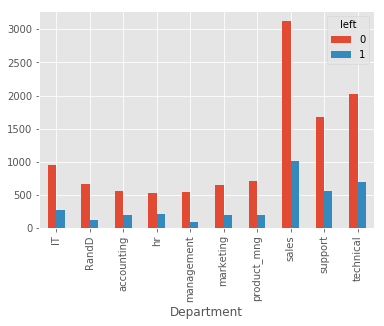

In [85]:
pd.crosstab(df.Department, df.left).plot(kind='bar')
plt.show()

Above bar chart shows employees with high salaries are likely to not leave the company 
but this however doesn't pose any tangible signifance 

### From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1. **Satisfaction Level**

2. **Average Monthly Hours**

3. **Promotion Last 5 Years**

4. **Salary**

In [86]:
sub_df = df[['satisfaction_level','average_montly_hours', 'promotion_last_5years', 'salary' ]]
sub_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


##### Tackling the salary dummies

In [87]:
#creating the salary dummy
salary_dummy = pd.get_dummies(sub_df.salary, prefix='salary')
salary_dummy.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [88]:
df_with_dummies = pd.concat([sub_df, salary_dummy], axis=1)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [90]:
#dropping the salary column
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


df_with_dummies.drop('salary', axis=1, inplace=True)
df_with_dummies.head()

### Preparing The Data Modelling

In [97]:
x=df_with_dummies
y= df['left']

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

### Training the model

In [111]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
y_pred = model.predict(x_test)
pred = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
pred

,Actual,Predicted
12955,0,1
3052,0,0
11616,0,0
9748,0,0
2800,0,0
...,...,...
8614,0,0
2943,0,0
10461,0,0
13069,0,0


In [119]:
model.predict(x_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [116]:
model.score(x_test, y_test)

0.789